# Failed Bank Data Analysis

For this project we will be analyzing the failed bank list. The source of this list is the FDIC website. The list includes bank failures since October 1, 2000.

### Background

In the context of this project, a failed bank, according to the FDIC, is an FDIC insured bank that is unable to meet its obligations to depositors and others.

The source of this data is the FDIC failed bank list, which can be found on the FDIC website. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv('from_sheets_failed_banklist_data.csv')

In [17]:
data.head()

,Bank Name,City,State,Cert,Acquiring Institution,Closing Date,Fund
0,Citizens Bank,Sac City,IA,8758,Iowa Trust & Savings Bank,3-Nov-23,10545
1,Heartland Tri-State Bank,Elkhart,KS,25851,"Dream First Bank, N.A.",28-Jul-23,10544
2,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",1-May-23,10543
3,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",12-Mar-23,10540
4,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,10-Mar-23,10539


In [35]:
data.columns = ['Bank Name', 'City', 'State', 'Cert', 'Acquiring Institution',
       'Closing Date', 'Fund']

In [25]:
data.State.head()

0    IA
1    KS
2    CA
3    NY
4    CA
Name: State, dtype: object

What states has the most failed banks?

In [41]:
data.State.value_counts().head(10)

GA    93
FL    76
IL    69
CA    43
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
Name: State, dtype: int64

In [42]:
data.State.nunique()

44

From this dataset, we see a disparity in the number of failed banks for each state. The above output are the top 10 states with the most bank failures since 2000. We can plot these numbers to get a feel for the differences in magnitude.

<AxesSubplot:ylabel='State'>

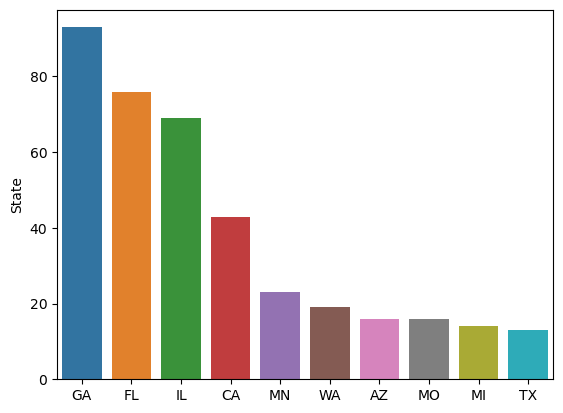

In [54]:
sns.barplot(x = data.State.value_counts().head(10).index,y = data.State.value_counts().head(10) )

In [79]:
state_counts = data.State.value_counts() 

In [94]:
state_counts.value_counts() #given a number, counting how many states have that as their bank closure count.

1     5
2     4
3     4
4     4
7     4
10    4
16    2
6     2
12    2
8     2
9     1
5     1
93    1
76    1
13    1
14    1
19    1
23    1
43    1
69    1
11    1
Name: State, dtype: int64

In [89]:
state_counts[(state_counts <= 13) & (state_counts.index != 'TX')].shape[0]

34

In [92]:
34/44

0.7727272727272727

We have $34/44 = 77\%$ of states have less than 13 banks fail since October 1, 2000.

### Conclusion

Looking at the data, we can see disparities in the numbers of failed banks per state. The next step is to understand why these disparities exist. 